
**Q5. Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. Determine the number of clusters using the elbow method. Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data.** <br>
Referred to the code by _@shubham0204_ on Github.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("sales_data_sample.csv", encoding='Latin-1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
# For clustering, we need all features to be numerical
# if not, we need to perform feature transformation
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [4]:
# Check which features have missing values
# all of these features (mostly depicting location of the order) will be removed
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [5]:
# Convert ORDERDATE to a numeric attribute (Unix timestamp)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['ORDERDATE'] = df['ORDERDATE'].astype('int64') // 10**9    # gives number of nanoseconds till now

# Transform STATUS into a numeric attribute - label encoding
df['STATUS'] = df['STATUS'].replace('Shipped', 1)
df['STATUS'] = df['STATUS'].replace('Resolved', 2)
df['STATUS'] = df['STATUS'].replace('Cancelled', 3)
df['STATUS'] = df['STATUS'].replace('On Hold', 4)
df['STATUS'] = df['STATUS'].replace('Disputed', 5)
df['STATUS'] = df['STATUS'].replace('In Process', 6)

# Remove PRODUCTCODE
df = df.drop(columns=['PRODUCTCODE'])

# Remove address fields
df = df.drop(columns=['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'TERRITORY', 'CITY', 'STATE', 'COUNTRY'])

# Remove attributes that uniquely identify the customer or the order
df = df.drop(columns=['CUSTOMERNAME', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'PHONE'])

# Convert productline to one hot encoding
df = pd.get_dummies(df, columns=['PRODUCTLINE'])

In [6]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2.823000e+03,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,1.084235e+09,1.198371,2.717676,7.092455,2003.81509,100.715551,0.342543,0.117251,0.108395,0.082891,0.027276,0.106624,0.215019
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.992714e+07,0.803278,1.203878,3.656633,0.69967,40.187912,0.474644,0.321776,0.310934,0.275766,0.162915,0.308689,0.410909
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.041811e+09,1.000000,1.000000,1.000000,2003.00000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,1.068120e+09,1.000000,2.000000,4.000000,2003.00000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,1.087258e+09,1.000000,3.000000,8.000000,2004.00000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,1.100693e+09,1.000000,4.000000,11.000000,2004.00000,124.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,1.117498e+09,6.000000,4.000000,12.000000,2005.00000,214.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
0,10107,30,95.70,2,2871.00,1046044800,1,1,2,2003,95,0,1,0,0,0,0,0
1,10121,34,81.35,5,2765.90,1052265600,1,2,5,2003,95,0,1,0,0,0,0,0
2,10134,41,94.74,2,3884.34,1057017600,1,3,7,2003,95,0,1,0,0,0,0,0
3,10145,45,83.26,6,3746.70,1061769600,1,3,8,2003,95,0,1,0,0,0,0,0
4,10159,49,100.00,14,5205.27,1065744000,1,4,10,2003,95,0,1,0,0,0,0,0


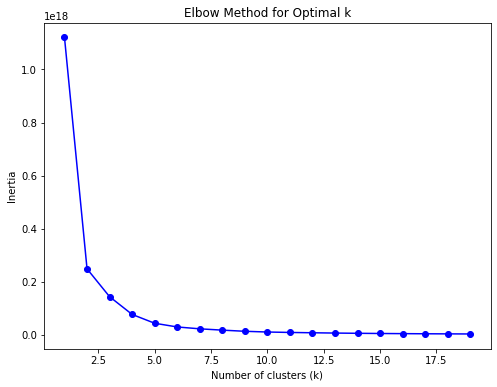

In [10]:
dataset = df.values

# Store within-cluster sum of squares for different number of clusters
# Find optimal number of clusters
WCSS = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(dataset)
    WCSS.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1,20), WCSS, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [11]:
# Optimal number of clusters seems to be 3
model = KMeans(n_clusters=3)
model.fit(dataset)
labels = model.predict(dataset)
centroids = model.cluster_centers_

In [12]:
# Reduce the dimensions of the data to 2 to visualize it on a 2D plane
pca = PCA(2)
reduced_dataset = pca.fit_transform(dataset)
reduced_centroids = pca.transform(centroids)

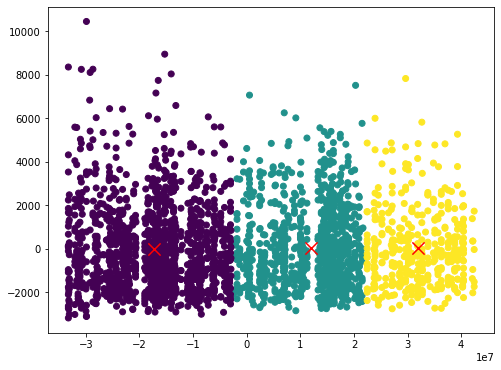

In [14]:
# Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(reduced_dataset[:,0], reduced_dataset[:,1], c=labels)
plt.scatter(reduced_centroids[:,0], reduced_centroids[:,1], marker='x', s=150, c='r')
plt.show()